### Preparing to measure time and memory usage

In [1]:
library(peakRAM)

my_func <- function() {
    
    # código para mensuração do tempo e memória
    for(i in 1:5) {
        mean(rnorm(1e1))
    } 

}

mem.obj <- peakRAM(my_func)

time_elapsed <- mem.obj$Elapsed_Time_sec
memory_used <- mem.obj$Peak_RAM_Used_MiB

print(time_elapsed)
print(memory_used)

[1] 0.002
[1] 0.1


### Installing libraries

In [36]:
# withr::with_makevars(c(CXX = "g++ -std=c++11"),install.packages("xml2", verbose = TRUE))

## Normal installation: CRAN
install.packages('tidyverse')
# install.packages('pander')
# install.packages('SoupX')
# install.packages('textshaping')
# install.packages('hdf5r')

# BiocManager
if(!require('BiocManager', quietly=T))
    install.packages('BiocManager')
BiocManager::install('Rqc')
# BiocManager::install('BiocIO')
# BiocManager::install('QuasR')
# BiocManager::install('DESeq2')
# BiocManager::install('org.Hs.eg.db')
# BiocManager::install('clusterProfiler')
# BiocManager::install('AnnotationDbi')
# BiocManager::install('Seurat')
# BiocManager::install('biomaRt')
# BiocManager::install('ComplexHeatmap')
# BiocManager::install('EnhancedVolcano')
# BiocManager::install('harmony')
# BiocManager::install('hdf5r')

## devtools
install.packages("devtools")
devtools::install_github("stephenturner/annotables")

system (cmd0): /home/carlosseiya/miniconda3/envs/variantcalling/lib/R/bin/R CMD INSTALL

foundpkgs: hdf5r, /tmp/Rtmpzoou6y/downloaded_packages/hdf5r_1.3.8.tar.gz

files: /tmp/Rtmpzoou6y/downloaded_packages/hdf5r_1.3.8.tar.gz

Warning message in install.packages("hdf5r", verbose = TRUE):
“installation of package ‘hdf5r’ had non-zero exit status”
Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done



#### Checking if packages are really installed

In [6]:
# pkg <- .packages(all.available = TRUE)
# pkg

'getOption("repos")' replaces Bioconductor standard repositories, see
'help("repositories", package = "BiocManager")' for details.
Replacement repositories:
    CRAN: https://cran.r-project.org

Bioconductor version 3.17 (BiocManager 1.30.22), R 4.3.1 (2023-06-16)

Installing package(s) 'QuasR'

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done



### Loading libraries

In [8]:
library(Rqc)
library(QuasR)
library(tidyverse)
library(BiocIO)
library(Rsamtools)

### Setting paths

In [8]:
folder <- (system.file(package='QuasR', 'extdata'))
print(paste('This is package QuasR extdata folder:', folder, sep=' '))
cat('It has these files inside of it: ', dir(folder))

[1] "This is package QuasR extdata folder: /home/carlosseiya/miniconda3/envs/variantcalling/lib/R/library/QuasR/extdata"
It has these files inside of it:  auxiliaries.txt bis_1_1.fa.bz2 BSgenome.HSapiens.QuasR.hg19sub_0.1.0.tar.gz chip_1_1.fq.bz2 chip_2_1.fq.bz2 hg19sub_annotation.gtf hg19sub_snp.txt hg19sub.fa mirbaseXX_qsr.gff3 mirna_1.fa NC_001422.1.fa phiX_paired_withSecondary_sampleFile.txt phiX_paired_withSecondary.bam phiX_paired_withSecondary.bam.bai rna_1_1.fq.bz2 rna_1_2.fq.bz2 rna_2_1.fq.bz2 rna_2_2.fq.bz2 samples_bis_single.txt samples_chip_single.txt samples_mirna.txt samples_rna_paired.txt samples_rna_single.txt

In [6]:
filenames <- list.files(folder)[grepl('^chip|hg19sub.fa', list.files(folder))]
cat('These three are the files that i want to use: ', filenames)

path_to_data <- '/home/carlosseiya/bioinfo/data'
print(list.files(path_to_data))

chip_filenames <- list.files(folder)[grepl('^chip', list.files(folder))]
fastqFiles <- paste(path_to_data, chip_filenames, sep='/')
print(fastqFiles)

These three are the files that i want to use:  chip_1_1.fq.bz2 chip_2_1.fq.bz2 hg19sub.facharacter(0)
[1] "/home/carlosseiya/bioinfo/data/chip_1_1.fq.bz2"
[2] "/home/carlosseiya/bioinfo/data/chip_2_1.fq.bz2"


### Quality Control
- Rqc: https://bioconductor.org/packages/release/bioc/html/Rqc.html

In [2]:
library(Rqc)

path <- '/home/carlosseiya/bioinfo/data'

list.files(path)

Loading required package: BiocParallel

Loading required package: ShortRead

Loading required package: BiocGenerics


Attaching package: ‘BiocGenerics’


The following objects are masked from ‘package:stats’:

    IQR, mad, sd, var, xtabs


The following objects are masked from ‘package:base’:

    anyDuplicated, aperm, append, as.data.frame, basename, cbind,
    colnames, dirname, do.call, duplicated, eval, evalq, Filter, Find,
    get, grep, grepl, intersect, is.unsorted, lapply, Map, mapply,
    match, mget, order, paste, pmax, pmax.int, pmin, pmin.int,
    Position, rank, rbind, Reduce, rownames, sapply, setdiff, sort,
    table, tapply, union, unique, unsplit, which.max, which.min


Loading required package: Biostrings

Loading required package: S4Vectors

Loading required package: stats4


Attaching package: ‘S4Vectors’


The following object is masked from ‘package:utils’:

    findMatches


The following objects are masked from ‘package:base’:

    expand.grid, I, unname


Load

[1] "align_txt.txt"               "bowtie2_index"              
[3] "bowtie2_mapped"              "chip_1_1.fq.bz2"            
[5] "chip_2_1.fq.bz2"             "count_table.csv"            
[7] "deseq_results.csv"           "hg19sub.fa"                 
[9] "Homo_sapiens.GRCh38.105.gtf"

In [15]:
run_rqc <- function() {
    
    qRes <- rqc(path=path,
                pattern='^chip.*bz2$',
                openBrowser=F,
                outdir=path)

    rqc_report <- rqcReport(qRes, outdir=path, file='rqc_report')
}

mem.obj <- peakRAM(run_rqc())
time_elapsed <- mem.obj$Elapsed_Time_sec
memory_used <- mem.obj$Peak_RAM_Used_MiB

cat('Time elapsed: ', time_elapsed, 'Memory used: ', memory_used)

'/home/carlosseiya/bioinfo/data/rqc_report.html' has been created.



Time elapsed:  30.738 Memory used:  79.3

### Trimming

- ShortRead: https://bioconductor.org/packages/release/bioc/html/ShortRead.html
- OBS: resultados darão um pouco diferentes do Python, devido a lógica de trimmar. Aqui, ele está sendo mais "seletivo", pois para passar, todas os pares de bases precisam ter o Phred Score >= 20

In [2]:
library(Rqc)
library(ShortRead)

Loading required package: BiocParallel

Loading required package: ShortRead

Loading required package: BiocGenerics


Attaching package: ‘BiocGenerics’


The following objects are masked from ‘package:stats’:

    IQR, mad, sd, var, xtabs


The following objects are masked from ‘package:base’:

    anyDuplicated, aperm, append, as.data.frame, basename, cbind,
    colnames, dirname, do.call, duplicated, eval, evalq, Filter, Find,
    get, grep, grepl, intersect, is.unsorted, lapply, Map, mapply,
    match, mget, order, paste, pmax, pmax.int, pmin, pmin.int,
    Position, rank, rbind, Reduce, rownames, sapply, setdiff, sort,
    table, tapply, union, unique, unsplit, which.max, which.min


Loading required package: Biostrings

Loading required package: S4Vectors

Loading required package: stats4


Attaching package: ‘S4Vectors’


The following object is masked from ‘package:utils’:

    findMatches


The following objects are masked from ‘package:base’:

    expand.grid, I, unname


Load

In [6]:
folder <- (system.file(package='QuasR', 'extdata'))
# filenames <- list.files(folder)[grepl('^chip|hg19sub.fa', list.files(folder))]
# cat('These three are the files that i want to use: ', filenames)

path_to_data <- '/home/carlosseiya/bioinfo/data'
# print(list.files(path_to_data))

chip_filenames <- list.files(folder)[grepl('^chip', list.files(folder))]
fastqFiles <- paste(path_to_data, chip_filenames, sep='/')
# print(fastqFiles)

In [13]:
# quality trimming
quality_trimming <- function() {
    for(i in 1:length(fastqFiles)){
        fastqFile <- fastqFiles[i]

        f <- FastqStreamer(fastqFile, readerBlockSize=1000)

        while(length(fq <- yield(f))) {
            # get quality score per base as a matrix
            qPerBase <- as(quality(fq), 'matrix')

            qcount <- rowSums(qPerBase < 20)

            print(paste('pb trimmed out: ', as.character(sum(qcount)), sep=''))
            print(paste('# reads with all phred scores >= 20 for file',
                        as.character(gsub('.*chip', 'chip', fastqFile))))
            print(fq[qcount == 0])

            writeFastq(fq[qcount==0],
                       paste(gsub('\\.fq.bz2', '', fastqFile), 'Qfiltered_R', '.fq.bz2', sep='_'),
                       mode='a') # mode a: write every row/block to the same fastq file
        }
    }
}

mem.obj <- peakRAM(quality_trimming())
time_elapsed <- mem.obj$Elapsed_Time_sec
memory_used <- mem.obj$Peak_RAM_Used_MiB

cat('Time elapsed: ', time_elapsed, 'Memory used: ', memory_used)

[1] "pb trimmed out: 18196"
[1] "# reads with all phred scores >= 20 for file chip_1_1.fq.bz2"
class: ShortReadQ
length: 492 reads; width: 36 cycles
[1] "pb trimmed out: 38750"
[1] "# reads with all phred scores >= 20 for file chip_2_1.fq.bz2"
class: ShortReadQ
length: 630 reads; width: 36 cycles
Time elapsed:  0.142 Memory used:  5

- chip_1_1.fq.bz2: 18,196 bp
- chip_2_1.fq.bz2: 38,750 bp

### Filtering
- QuasR: https://bioconductor.org/packages/release/bioc/html/QuasR.html

In [1]:
library(QuasR)

Loading required package: parallel

Loading required package: GenomicRanges

Loading required package: stats4

Loading required package: BiocGenerics


Attaching package: ‘BiocGenerics’


The following objects are masked from ‘package:stats’:

    IQR, mad, sd, var, xtabs


The following objects are masked from ‘package:base’:

    anyDuplicated, aperm, append, as.data.frame, basename, cbind,
    colnames, dirname, do.call, duplicated, eval, evalq, Filter, Find,
    get, grep, grepl, intersect, is.unsorted, lapply, Map, mapply,
    match, mget, order, paste, pmax, pmax.int, pmin, pmin.int,
    Position, rank, rbind, Reduce, rownames, sapply, setdiff, sort,
    table, tapply, union, unique, unsplit, which.max, which.min


Loading required package: S4Vectors


Attaching package: ‘S4Vectors’


The following object is masked from ‘package:utils’:

    findMatches


The following objects are masked from ‘package:base’:

    expand.grid, I, unname


Loading required package: IRanges

Loading

In [2]:
folder <- (system.file(package='QuasR', 'extdata'))
# filenames <- list.files(folder)[grepl('^chip|hg19sub.fa', list.files(folder))]
# cat('These three are the files that i want to use: ', filenames)

path_to_data <- '/home/carlosseiya/bioinfo/data'
# print(list.files(path_to_data))

chip_filenames <- list.files(folder)[grepl('^chip', list.files(folder))]
fastqFiles <- paste(path_to_data, chip_filenames, sep='/')
# print(fastqFiles)

In [13]:
# filtering
outputFiles <- paste(tempfile(pattern=c('chip_1_1_processed_R_', 'chip_2_1_processed_2_R_'),
                              tmpdir=gsub('\\/$', '', path_to_data)),
                     '.fastq',
                     sep='')

filterReads <- function() {
    preprocessReads(filename=fastqFiles,
                    outputFilename=outputFiles,
                    nBases=1,
                    truncateEndBases=3,
                    minLength=10)
}

mem.obj <- peakRAM(filterReads())
time_elapsed <- mem.obj$Elapsed_Time_sec
memory_used <- mem.obj$Peak_RAM_Used_MiB

cat('Time elapsed: ', time_elapsed, 'Memory used: ', memory_used)

  filtering /home/carlosseiya/bioinfo/data/chip_1_1.fq.bz2

  filtering /home/carlosseiya/bioinfo/data/chip_2_1.fq.bz2



Time elapsed:  0.828 Memory used:  101.3

- chip_1_1: Reads written: 2597 (0 out)
- chip_2_1: Reads written: 4105 (9 out)

### Alignment / Mapping
- QuasR: https://bioconductor.org/packages/release/bioc/html/QuasR.html
- Rbowtie: https://bioconductor.org/packages/release/bioc/html/Rbowtie.html
- Rsamtools: https://bioconductor.org/packages/release/bioc/html/Rsamtools.html

In [5]:
library(QuasR)
library(Rsamtools)

Loading required package: parallel

Loading required package: GenomicRanges

Loading required package: stats4

Loading required package: BiocGenerics


Attaching package: ‘BiocGenerics’


The following objects are masked from ‘package:lubridate’:

    intersect, setdiff, union


The following objects are masked from ‘package:dplyr’:

    combine, intersect, setdiff, union


The following objects are masked from ‘package:stats’:

    IQR, mad, sd, var, xtabs


The following objects are masked from ‘package:base’:

    anyDuplicated, aperm, append, as.data.frame, basename, cbind,
    colnames, dirname, do.call, duplicated, eval, evalq, Filter, Find,
    get, grep, grepl, intersect, is.unsorted, lapply, Map, mapply,
    match, mget, order, paste, pmax, pmax.int, pmin, pmin.int,
    Position, rank, rbind, Reduce, rownames, sapply, setdiff, sort,
    table, tapply, union, unique, unsplit, which.max, which.min


Loading required package: S4Vectors


Attaching package: ‘S4Vectors’


The follo

In [6]:
folder <- (system.file(package='QuasR', 'extdata'))
filenames <- list.files(folder)[grepl('^chip|hg19sub.fa', list.files(folder))]
# cat('These three are the files that i want to use: ', filenames)

path_to_data <- '/home/carlosseiya/bioinfo/data'
# print(list.files(path_to_data))

chip_filenames <- list.files(folder)[grepl('^chip', list.files(folder))]
fastqFiles <- paste(path_to_data, chip_filenames, sep='/')
# print(fastqFiles)

In [7]:
# preparação para rodar a função de alinhamento
genomeFile <- paste(path_to_data, 'hg19sub.fa', sep='/')
sampleFile <- paste(path_to_data, 'align_txt.txt', sep='/')

align_txt <- cbind(fastqFiles, paste('Sample', rep(1:length(fastqFiles)), sep=''))
colnames(align_txt) <- c('FileName', 'SampleName')
write.table(x=align_txt, file=sampleFile, col.names=T, row.names=F, quote=F, sep='\t')

# função de alinhamento - criação de index + alinhamento
alignment <- function() {
    proj <- qAlign(sampleFile, genomeFile)
    # list.files(path_to_data, pattern='.bam$')
    
    # alignment statistics
    # qQCReport(proj, pdfFilename=paste(path_to_data, 'qc_report.pdf', sep='/'))
    # alignmentStats(proj)

    # export genome wig file from alignments
    # wigOutput <- c(paste(path_to_data, paste('Sample', rep(1:length(fastqFiles)), '.wig.gz', sep=''), sep='/'))
    # qExportWig(proj, file=wigOutput, binsize=100L, scaling=TRUE, collapseBySample=TRUE)
    
    bam_files = list.files(path_to_data)[grepl('\\.bam$', list.files(path_to_data))]
    for(i in 1:length(bam_files)) {
        chip.bam <- paste(path_to_data, bam_files[i], sep='/')
        filename <- sub("\\..*", "", bam_files[i])
        # print(paste(filename, '.sorted', sep=''))
        chipBAM <- BamFile(chip.bam)
        quickBamFlagSummary(chipBAM)
        sortBam(file=chip.bam, destination=paste(path_to_data, paste(filename, '.sorted', sep=''), sep='/'))
    }
}

mem.obj <- peakRAM(alignment())
time_elapsed <- mem.obj$Elapsed_Time_sec
memory_used <- mem.obj$Peak_RAM_Used_MiB

cat('Time elapsed: ', time_elapsed, 'Memory used: ', memory_used)

alignment files missing - need to:

    create alignment index for the genome

    create 2 genomic alignment(s)

Creating an Rbowtie index for /home/carlosseiya/bioinfo/data/hg19sub.fa

Finished creating index

Testing the compute nodes...
OK

Loading QuasR on the compute nodes...
preparing to run on 1 nodes...
done

Available cores:

LAPTOP-VM7HGI1C: 1

Performing genomic alignments for 2 samples. See progress in the log file:

/home/carlosseiya/bioinfo/scripts/QuasR_log_152444597830.txt

Genomic alignments have been created successfully





                                group |    nb of |    nb of | mean / max
                                   of |  records |   unique | records per
                              records | in group |   QNAMEs | unique QNAME
All records........................ A |     2597 |     2597 |    1 / 1
  o template has single segment.... S |     2597 |     2597 |    1 / 1
  o template has multiple segments. M |        0 |        0 |   NA / NA
      - first segment.............. F |        0 |        0 |   NA / NA
      - last segment............... L |        0 |        0 |   NA / NA
      - other segment.............. O |        0 |        0 |   NA / NA

Note that (S, M) is a partitioning of A, and (F, L, O) is a partitioning of M.
Indentation reflects this.

Details for group S:
  o record is mapped.............. S1 |     2339 |     2339 |    1 / 1
      - primary alignment......... S2 |     2339 |     2339 |    1 / 1
      - secondary alignment....... S3 |        0 |        0 |   NA / NA
  o r

### RNASeq

#### DEG (Differentially Expressed Genes) Analysis
- DESeq2: https://bioconductor.org/packages/release/bioc/html/DESeq2.html

In [3]:
# loading libraries
library(DESeq2)

In [ ]:
run_deseq2 <- function () {
    # data importing
    Counts <- read.delim('~/bioinfo/data/count_table.csv', header=TRUE, row.names=1, sep=',')
    
    # data preprocessing
    Counts <- Counts[which(rowSums(Counts) > 0), ]
    
    # simple visualization
    # Counts

    # setting metadata
    condition <- factor(c('C', 'C', 'C', 'C', 'RS', 'RS', 'RS', 'RS'))
    metadata <- data.frame(row.names = colnames(Counts), condition)
    # metadata

    # running deseq
    dds <- DESeqDataSetFromMatrix(countData = Counts, colData = metadata, design = ~condition)
    dds <- DESeq(dds)

    # getting results from deseq
    vsdata <- vst(dds, blind=FALSE)
    res <- results(dds, contrast = c('condition', 'C', 'RS'))

    ## post-results processing and filtering

    # removing na
    res <- na.omit(res)

    # filtering
    res <- res[res$baseMean >= 10, ]
    sigs <- res[((res$padj < 0.05)  & (res$log2FoldChange < -0.5)) | ((res$padj < 0.05)  & (res$log2FoldChange > 0.5)), ]
    return(sigs)
}

mem.obj <- peakRAM(run_deseq2())
time_elapsed <- mem.obj$Elapsed_Time_sec
memory_used <- mem.obj$Peak_RAM_Used_MiB

cat('Time elapsed: ', time_elapsed, 'Memory used: ', memory_used)

In [4]:
# data importing
Counts <- read.delim('~/bioinfo/data/count_table.csv', header=TRUE, row.names=1, sep=',')

# data preprocessing
Counts <- Counts[which(rowSums(Counts) > 0), ]

# simple visualization
# Counts

# setting metadata
condition <- factor(c('C', 'C', 'C', 'C', 'RS', 'RS', 'RS', 'RS'))
metadata <- data.frame(row.names = colnames(Counts), condition)
# metadata

# running deseq
dds <- DESeqDataSetFromMatrix(countData = Counts, colData = metadata, design = ~condition)
dds <- DESeq(dds)

# getting results from deseq
vsdata <- vst(dds, blind=FALSE)
res <- results(dds, contrast = c('condition', 'C', 'RS'))

## post-results processing and filtering

# removing na
res <- na.omit(res)

# filtering
res <- res[res$baseMean >= 10, ]
sigs <- res[((res$padj < 0.05)  & (res$log2FoldChange < -0.5)) | ((res$padj < 0.05)  & (res$log2FoldChange > 0.5)), ]

estimating size factors

estimating dispersions

gene-wise dispersion estimates

mean-dispersion relationship

final dispersion estimates

fitting model and testing



#### Plotting

In [ ]:
library(ggplot2)

##### PCA Plot (For DDS)

In [5]:
plot_pca <- function() {
    plotPCA(vsdata, intgroup='condition')
}

mem.obj <- peakRAM(plot_pca())
time_elapsed <- mem.obj$Elapsed_Time_sec
memory_used <- mem.obj$Peak_RAM_Used_MiB

cat('Time elapsed: ', time_elapsed, 'Memory used: ', memory_used)

Time elapsed:  0.387 Memory used:  4.9

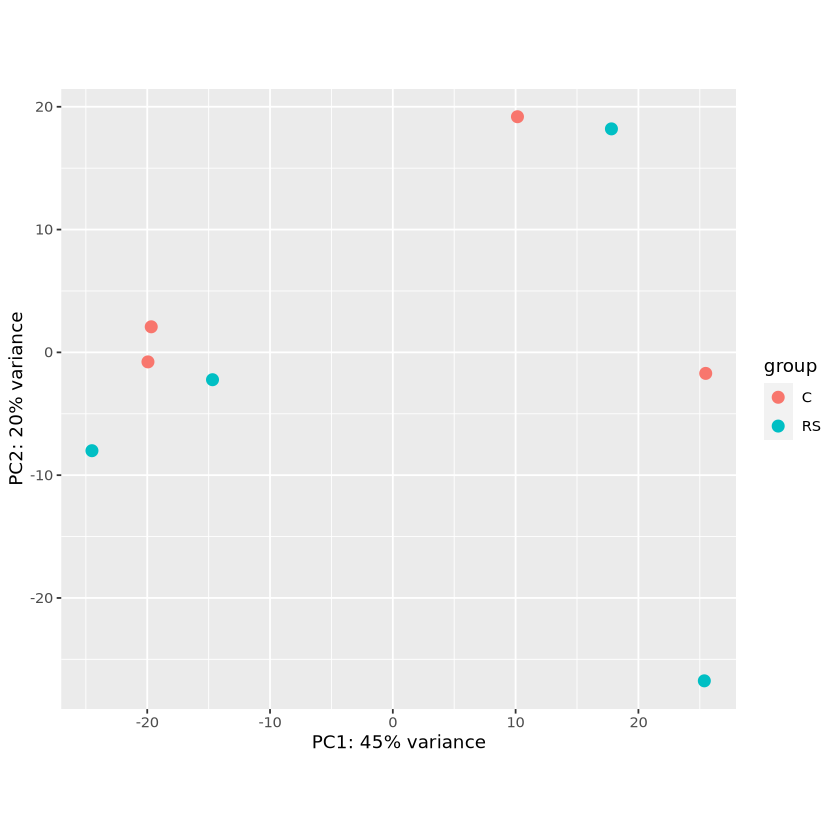

In [6]:
plotPCA(vsdata, intgroup='condition')

##### Heatmap (For DDS)

In [7]:
# normalizing for heatmap
sigs.df <- as.data.frame(sigs)
mat <- counts(dds, normalized=TRUE)[rownames(sigs.df), ]
mat.z <- t(apply(mat, 1, scale))
colnames(mat.z) <- rownames(metadata)
mat.z

,Ctr_s1,Ctr_s2,Ctr_s7,Ctr_s13,RS_s6,RS_s9,RS_s12,RS_s16
ENSG00000069424,-0.87604622,-0.24361869,-1.1950785,-0.94669838,1.19575818,0.4420471,0.13898780,1.48464870
ENSG00000116254,-0.74351954,-0.49085892,-0.6222450,-0.81623054,-0.06808780,0.1131241,0.39666599,2.23115175
ENSG00000204138,0.08194585,1.01522030,1.2099847,1.05030209,-1.31195940,-0.4948519,-1.11225887,-0.43838280
ENSG00000198830,1.04222532,-0.45579210,1.6759839,0.67343247,-0.79896576,-0.3274659,-0.73005222,-1.07936571
ENSG00000060688,0.70621905,0.65446975,1.3376070,0.91624086,-0.90432709,-0.7090672,-1.24690952,-0.75423282
ENSG00000134690,0.63232308,0.05624689,1.8078414,0.75456045,-0.70844489,-0.6016367,-0.89310348,-1.04778680
ENSG00000158008,-0.56131395,-0.87459144,-0.4698015,-0.82216478,-0.47914840,0.5939267,2.02309657,0.58999681
ENSG00000092853,0.55098120,0.06635662,1.4696055,1.22094437,-0.52987964,-0.5805378,-1.03040926,-1.16706098
ENSG00000228436,-0.36965226,-1.18759800,-0.7651265,-1.04353432,0.97043838,1.1903247,1.19154397,0.01360405
ENSG00000183431,0.65764153,0.51594235,1.2722844,1.08325173,-0.33979132,-1.0581601,-1.10475329,-1.02641533


In [8]:
library(ComplexHeatmap)

Loading required package: grid


Attaching package: 'grid'


The following object is masked from 'package:Biostrings':

    pattern


ComplexHeatmap version 2.16.0
Bioconductor page: http://bioconductor.org/packages/ComplexHeatmap/
Github page: https://github.com/jokergoo/ComplexHeatmap
Documentation: http://jokergoo.github.io/ComplexHeatmap-reference

If you use it in published research, please cite either one:
- Gu, Z. Complex Heatmap Visualization. iMeta 2022.
- Gu, Z. Complex heatmaps reveal patterns and correlations in multidimensional 
    genomic data. Bioinformatics 2016.


The new InteractiveComplexHeatmap package can directly export static 
complex heatmaps into an interactive Shiny app with zero effort. Have a try!

This message can be suppressed by:
  suppressPackageStartupMessages(library(ComplexHeatmap))




In [9]:
plot_heatmap <- function(){
    h <- Heatmap(mat.z,
            cluster_rows = TRUE,
            cluster_columns = TRUE,
            column_labels = colnames(mat.z),
            name = 'Z score',
            row_labels = rownames(sigs.df[rownames(mat.z), ]),
            show_row_names = TRUE)

    # png('heatmap_R.png', res=250, width=1000, height=2000)
    # print(h)
    # dev.off()
    h
}

mem.obj <- peakRAM(plot_heatmap())
time_elapsed <- mem.obj$Elapsed_Time_sec
memory_used <- mem.obj$Peak_RAM_Used_MiB

cat('Time elapsed: ', time_elapsed, 'Memory used: ', memory_used)

Time elapsed:  0.858 Memory used:  14.5

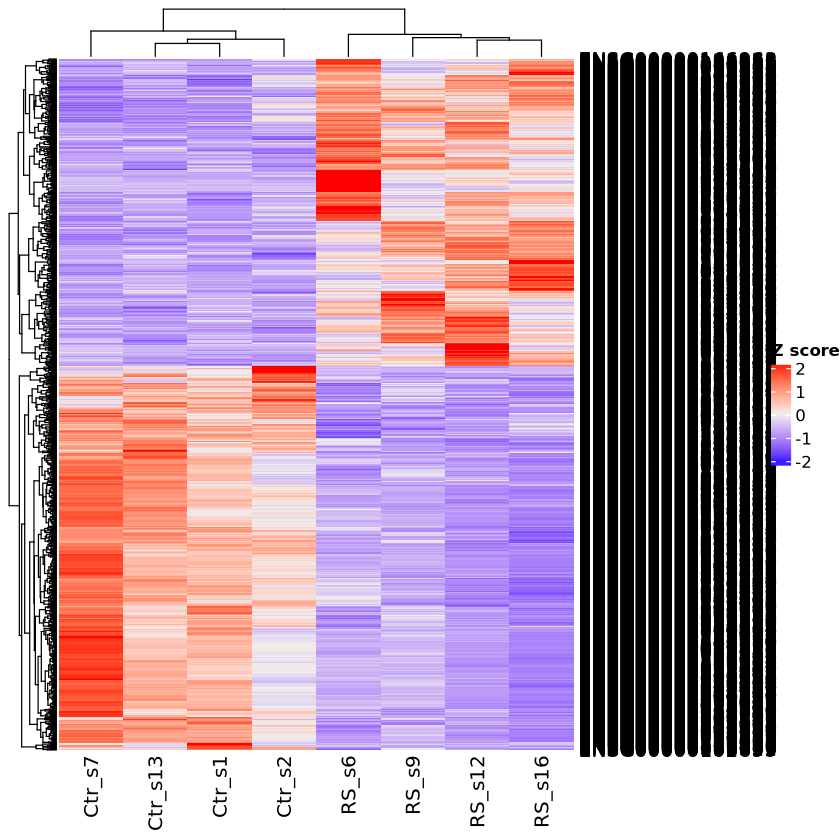

In [10]:
h <- Heatmap(mat.z,
        cluster_rows = TRUE,
        cluster_columns = TRUE,
        column_labels = colnames(mat.z),
        name = 'Z score',
        row_labels = rownames(sigs.df[rownames(mat.z), ]),
        show_row_names = TRUE)

# png('heatmap_R.png', res=250, width=1000, height=2000)
# print(h)
# dev.off()
h

##### Volcano Plot (For DDS)

In [11]:
library(AnnotationDbi)
library(org.Hs.eg.db)

In [12]:
# preparing for volcano plot
res.df <- as.data.frame(res)
res.df$symbol <- mapIds(org.Hs.eg.db, keys=rownames(res.df), keytype='ENSEMBL', column='SYMBOL')
head(res.df)

'select()' returned 1:many mapping between keys and columns



,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,symbol
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
ENSG00000160072,320.48117,0.49244169,0.1653303,2.9785331,0.002896318,0.03689856,ATAD3B
ENSG00000041988,103.35498,0.28233089,0.1680988,1.6795535,0.093044229,0.35964587,THAP3
ENSG00000142611,23.76658,1.89039018,0.8333408,2.2684479,0.023301920,0.15802001,PRDM16
ENSG00000225630,922.81146,-0.73303195,0.3755657,-1.9518073,0.050961081,0.25694847,MTND2P28
ENSG00000067606,24.02843,-0.33293627,0.3980010,-0.8365212,0.402861757,0.72374592,PRKCZ
ENSG00000131584,735.89022,0.05347704,0.2196215,0.2434964,0.807620865,0.93804225,ACAP3


In [13]:
library(EnhancedVolcano)

Loading required package: ggrepel



In [14]:
plot_volcano <- function() {
    EnhancedVolcano(res.df, x='log2FoldChange', y='padj', lab=res.df$symbol)
}

mem.obj <- peakRAM(plot_volcano())
time_elapsed <- mem.obj$Elapsed_Time_sec
memory_used <- mem.obj$Peak_RAM_Used_MiB

cat('Time elapsed: ', time_elapsed, 'Memory used: ', memory_used)

Time elapsed:  0.089 Memory used:  3.4

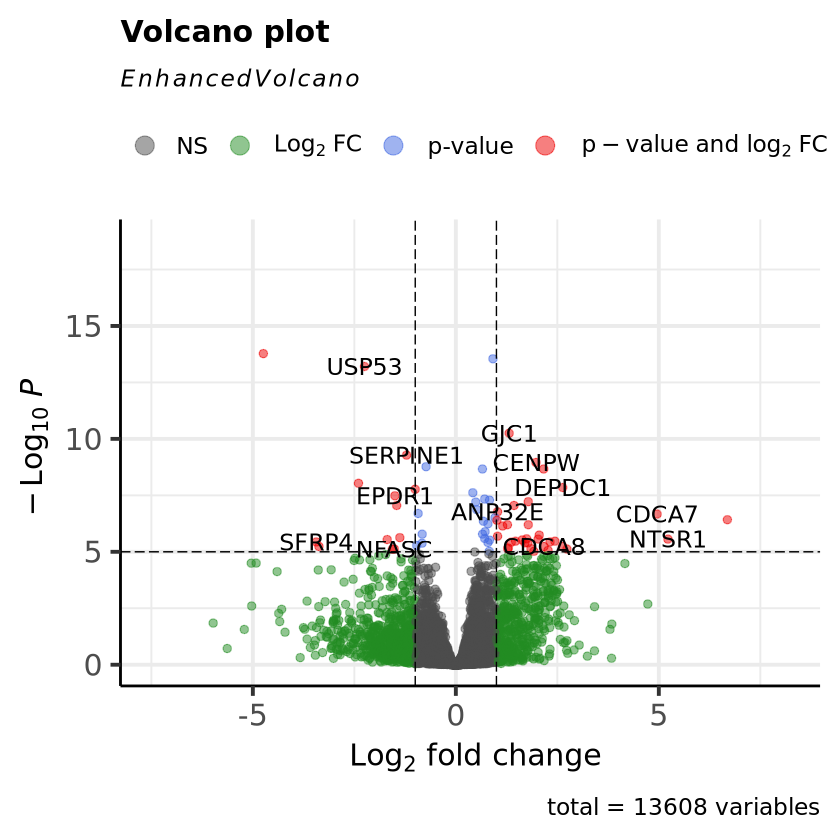

In [15]:
EnhancedVolcano(res.df, x='log2FoldChange', y='padj', lab=res.df$symbol)

##### Dispersion Estimates (For DDS)

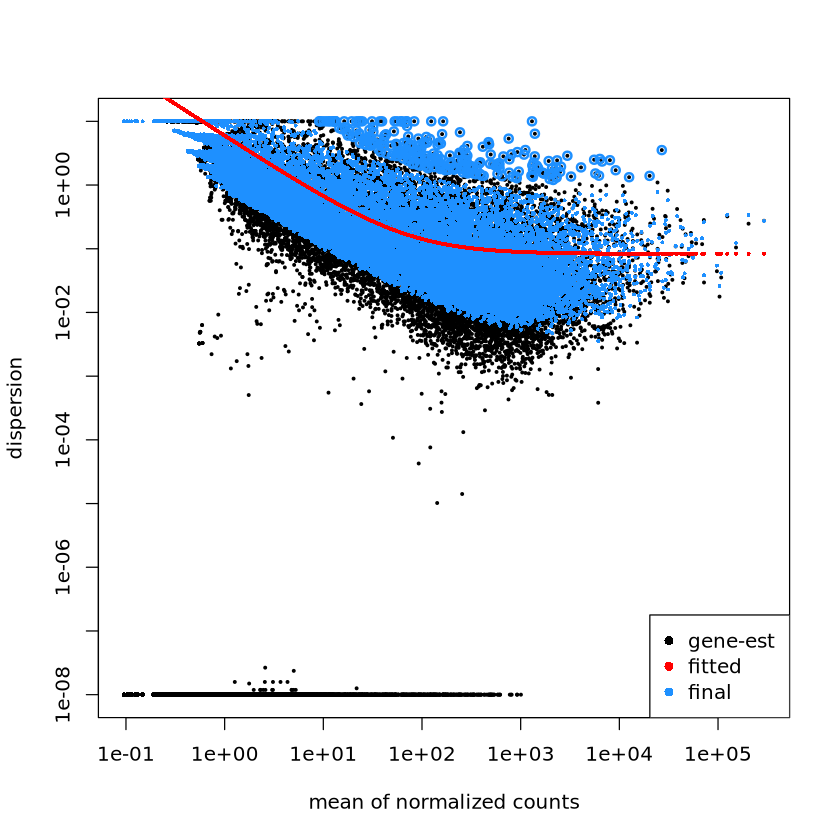

In [19]:
plotDispEsts(dds)

#### GSEA (Gene Set Enrichment Analysis)
- clusterProfiler: https://bioconductor.org/packages/release/bioc/html/clusterProfiler.html
- fgsea: https://bioconductor.org/packages/release/bioc/html/fgsea.html

In [16]:
# loading libraries
library(org.Hs.eg.db)
library(AnnotationDbi)
library(clusterProfiler)



Registered S3 methods overwritten by 'treeio':
  method              from    
  MRCA.phylo          tidytree
  MRCA.treedata       tidytree
  Nnode.treedata      tidytree
  Ntip.treedata       tidytree
  ancestor.phylo      tidytree
  ancestor.treedata   tidytree
  child.phylo         tidytree
  child.treedata      tidytree
  full_join.phylo     tidytree
  full_join.treedata  tidytree
  groupClade.phylo    tidytree
  groupClade.treedata tidytree
  groupOTU.phylo      tidytree
  groupOTU.treedata   tidytree
  inner_join.phylo    tidytree
  inner_join.treedata tidytree
  is.rooted.treedata  tidytree
  nodeid.phylo        tidytree
  nodeid.treedata     tidytree
  nodelab.phylo       tidytree
  nodelab.treedata    tidytree
  offspring.phylo     tidytree
  offspring.treedata  tidytree
  parent.phylo        tidytree
  parent.treedata     tidytree
  root.treedata       tidytree
  rootnode.phylo      tidytree
  sibling.phylo       tidytree

clusterProfiler v4.8.3  For help: https://yulab-smu

In [5]:
run_gsea <- function() {
    # preparing data
    res <- res[order(-res$stat), ]
    gene_list <- res$stat
    names(gene_list) <- rownames(res)
    # gene_list

    # running GSEA 
    gse <- gseGO(gene_list,
                 ont = 'BP',
                 keyType = 'ENSEMBL',
                 OrgDb = 'org.Hs.eg.db',
                 eps = 1e-300)

    # getting results in dataframe format
    as.data.frame(gse)

    # plotting
    fit <- gseaplot(gse, geneSetID = 1)

    # png('gsea_R.png', res=200, width=2000, height=1300)
    # print(fit)
    # dev.off()

    fit
}

mem.obj <- peakRAM(run_gsea())
time_elapsed <- mem.obj$Elapsed_Time_sec
memory_used <- mem.obj$Peak_RAM_Used_MiB
print(time_elapsed)
print(memory_used)

preparing geneSet collections...

GSEA analysis...

leading edge analysis...

done...



[1] 107.026
[1] 514.9


preparing geneSet collections...

GSEA analysis...

leading edge analysis...

done...



,ID,Description,setSize,enrichmentScore,NES,pvalue,p.adjust,qvalue,rank,leading_edge,core_enrichment
,<chr>,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
GO:0007059,GO:0007059,chromosome segregation,375,0.6648736,3.207685,6.326179e-61,3.419300e-57,2.400619e-57,1949,"tags=51%, list=14%, signal=45%",ENSG00000203760/ENSG00000174442/ENSG00000163535/ENSG00000164109/ENSG00000178999/ENSG00000134690/ENSG00000113810/ENSG00000117399/ENSG00000138778/ENSG00000112742/ENSG00000137812/ENSG00000090889/ENSG00000143228/ENSG00000013810/ENSG00000144554/ENSG00000094804/ENSG00000134057/ENSG00000146918/ENSG00000083642/ENSG00000076382/ENSG00000109805/ENSG00000121621/ENSG00000088325/ENSG00000164611/ENSG00000129810/ENSG00000138160/ENSG00000237649/ENSG00000184661/ENSG00000025770/ENSG00000151849/ENSG00000108055/ENSG00000169679/ENSG00000087586/ENSG00000122952/ENSG00000071539/ENSG00000142945/ENSG00000178295/ENSG00000161800/ENSG00000123473/ENSG00000178966/ENSG00000166451/ENSG00000114346/ENSG00000080986/ENSG00000156970/ENSG00000126787/ENSG00000161888/ENSG00000131747/ENSG00000214367/ENSG00000152253/ENSG00000171320/ENSG00000012048/ENSG00000167513/ENSG00000131470/ENSG00000010292/ENSG00000131351/ENSG00000121152/ENSG00000005022/ENSG00000163808/ENSG00000175305/ENSG00000157456/ENSG00000117724/ENSG00000187790/ENSG00000121957/ENSG00000166851/ENSG00000204899/ENSG00000136518/ENSG00000101057/ENSG00000117650/ENSG00000137807/ENSG00000066279/ENSG00000175063/ENSG00000108384/ENSG00000198901/ENSG00000136492/ENSG00000128944/ENSG00000165480/ENSG00000152240/ENSG00000089685/ENSG00000213024/ENSG00000112029/ENSG00000118193/ENSG00000123485/ENSG00000149503/ENSG00000079616/ENSG00000177602/ENSG00000154920/ENSG00000148773/ENSG00000101447/ENSG00000153187/ENSG00000031691/ENSG00000184445/ENSG00000154839/ENSG00000101639/ENSG00000198887/ENSG00000186185/ENSG00000004897/ENSG00000153044/ENSG00000146670/ENSG00000135476/ENSG00000249115/ENSG00000077097/ENSG00000167842/ENSG00000196230/ENSG00000151503/ENSG00000131462/ENSG00000102974/ENSG00000144635/ENSG00000104147/ENSG00000153147/ENSG00000072501/ENSG00000156876/ENSG00000166164/ENSG00000149636/ENSG00000173473/ENSG00000058804/ENSG00000085415/ENSG00000134222/ENSG00000040275/ENSG00000099956/ENSG00000118007/ENSG00000180198/ENSG00000127616/ENSG00000123219/ENSG00000159055/ENSG00000126215/ENSG00000163322/ENSG00000011332/ENSG00000076242/ENSG00000182504/ENSG00000108424/ENSG00000072864/ENSG00000117697/ENSG00000086827/ENSG00000182628/ENSG00000179051/ENSG00000136982/ENSG00000094914/ENSG00000121892/ENSG00000070950/ENSG00000163939/ENSG00000172732/ENSG00000163029/ENSG00000148335/ENSG00000119906/ENSG00000107949/ENSG00000108604/ENSG00000133302/ENSG00000101972/ENSG00000257103/ENSG00000116670/ENSG00000070831/ENSG00000130695/ENSG00000066117/ENSG00000092036/ENSG00000149273/ENSG00000137814/ENSG00000090273/ENSG00000113648/ENSG00000120253/ENSG00000010244/ENSG00000154473/ENSG00000177302/ENSG00000136824/ENSG00000136861/ENSG00000147874/ENSG00000185721/ENSG00000130640/ENSG00000126216/ENSG00000047410/ENSG00000121579/ENSG00000176108/ENSG00000091436/ENSG00000104983/ENSG00000175643/ENSG00000154429/ENSG00000163104/ENSG00000105127/ENSG00000128789/ENSG00000198824/ENSG00000020922/ENSG00000160783/ENSG00000137822/ENSG00000254093/ENSG00000168061/ENSG00000139687/ENSG00000169689/ENSG00000009954/ENSG00000100206/ENSG00000204463/ENSG00000075188
GO:0000280,GO:0000280,nuclear division,345,0.6591943,3.169199,1.141063e-54,3.083724e-51,2.165018e-51,1933,"tags=48%, list=14%, signal=42%",ENSG00000174442/ENSG00000163535/ENSG00000164109/ENSG00000178999/ENSG00000134690/ENSG00000113810/ENSG00000117399/ENSG00000138778/ENSG00000112742/ENSG00000090889/ENSG00000187741/ENSG00000143228/ENSG00000144554/ENSG00000134057/ENSG00000146918/ENSG00000085999/ENSG00000083642/ENSG00000076382/ENSG00000109805/ENSG00000121621/ENSG00000088325/ENSG00000164611/ENSG00000129810/ENSG00000138160/ENSG00000237649/ENSG00000184661/ENSG00000025770/ENSG00000051180/ENSG00000108055/ENSG00000169679/ENSG00000087586/ENSG00000122

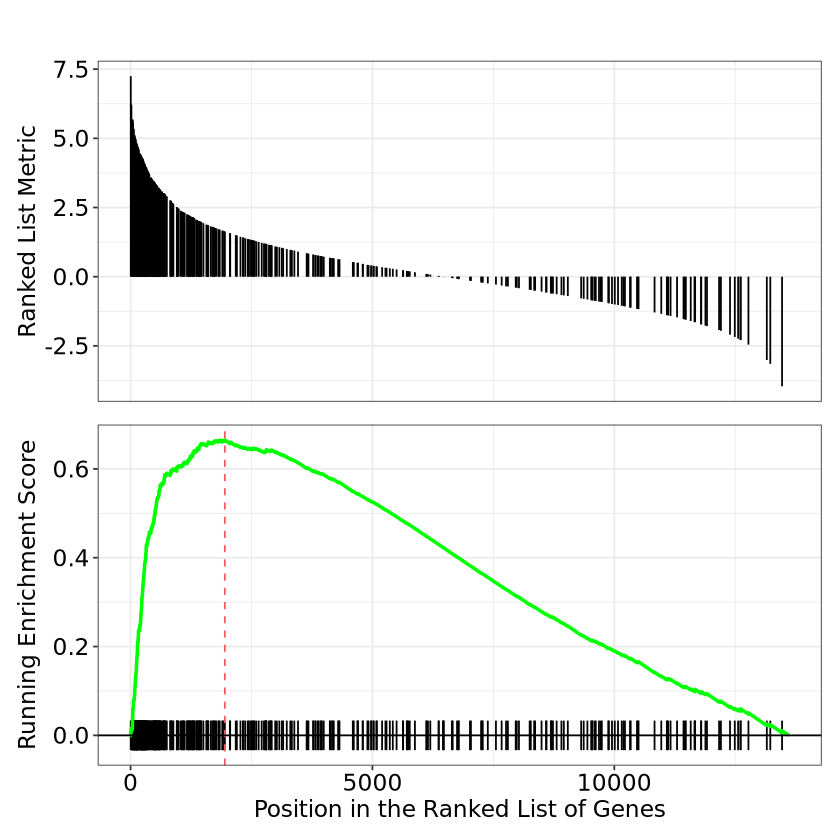

In [17]:
# preparing data
res <- res[order(-res$stat), ]
gene_list <- res$stat
names(gene_list) <- rownames(res)
# gene_list

# running GSEA 
gse <- gseGO(gene_list,
             ont = 'BP',
             keyType = 'ENSEMBL',
             OrgDb = 'org.Hs.eg.db',
             eps = 1e-300)

# getting results in dataframe format
as.data.frame(gse)

# plotting
fit <- gseaplot(gse, geneSetID = 1)

# png('gsea_R.png', res=200, width=2000, height=1300)
# print(fit)
# dev.off()

fit

#### Single-cell RNASeq analysis
- Seurat: https://cran.r-project.org/web/packages/Seurat/index.html

In [2]:
library(Seurat)
library(tidyverse)

Attaching SeuratObject

── Attaching core tidyverse packages ───────────────────────────────────────────────────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.3     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.4     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ─────────────────────────────────────────────────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


In [3]:
run_scAnalysis <- function() {
    # importing data
    path_10x_mtx <- '/home/carlosseiya/bioinfo/data/filtered_gene_bc_matrices/hg19/'
    pbmc.data <- Read10X(data.dir = path_10x_mtx)

    # preprocessing
    pbmc.seurat.obj <- CreateSeuratObject(counts = pbmc.data, project = 'pbmc3k',
                                          min.cells=3,
                                          min.features=200)

    # quality control
    pbmc.seurat.obj[['percent.mt']] <- PercentageFeatureSet(pbmc.seurat.obj, pattern='^MT-')
    # View(pbmc.seurat.obj@meta.data)

    # visualizing for filtering
    VlnPlot(pbmc.seurat.obj, features=c('nFeature_RNA', 'nCount_RNA', 'percent.mt'), ncol = 3)
    FeatureScatter(pbmc.seurat.obj, feature1='nCount_RNA', feature2='nFeature_RNA') +
        geom_smooth(method='lm')

    # filtering
    # upper.lim <- 1572
    upper.lim <- quantile(pbmc.seurat.obj[['nFeature_RNA']]$nFeature_RNA, probs = 0.98)
    lower.lim <- quantile(pbmc.seurat.obj[['nFeature_RNA']]$nFeature_RNA, probs=0.02)
    # lower.lim <- 361
    pbmc.seurat.obj <- subset(pbmc.seurat.obj,
                              subset = nFeature_RNA > lower.lim & nFeature_RNA < upper.lim & percent.mt < 20)

    # normalizing
    pbmc.seurat.obj <- NormalizeData(pbmc.seurat.obj)

    # highly variable genes
    pbmc.seurat.obj <- FindVariableFeatures(pbmc.seurat.obj, selection.method='vst', nfeatures=2000) # these are default values
    # top10 <- head(VariableFeatures(pbmc.seurat.obj), 10)
    # plot1 <- VariableFeaturePlot(pbmc.seurat.obj)
    # LabelPoints(plot = plot1, points = top10, repel = TRUE)

    # scaling
    all.genes <- rownames(pbmc.seurat.obj)
    pbmc.seurat.obj <- ScaleData(pbmc.seurat.obj, features = all.genes)

    # linear dimensionality reduction (PCA)
    pbmc.seurat.obj <- RunPCA(pbmc.seurat.obj, features = VariableFeatures(object = pbmc.seurat.obj))
    print(pbmc.seurat.obj[['pca']], dims=1:5, nfeatures=5)
    # DimHeatmap(pbmc.seurat.obj, dims=1, cells=500, balanced=TRUE)
    ElbowPlot(pbmc.seurat.obj)

    # clustering
    pbmc.seurat.obj <- FindNeighbors(pbmc.seurat.obj, dims=1:20)
    pbmc.seurat.obj <- FindClusters(pbmc.seurat.obj, resolution=c(.1, .3, .5, .7, 1))
    # View(pbmc.seurat.obj@meta.data)
    DimPlot(pbmc.seurat.obj, group.by = 'RNA_snn_res.1', label=TRUE)
    Idents(pbmc.seurat.obj) <- 'RNA_snn_res.1'

    # non-linear dimensionality reduction (UMAP)
    pbmc.seurat.obj <- RunUMAP(pbmc.seurat.obj, dims=1:20)
    DimPlot(pbmc.seurat.obj, reduction='umap')
}

mem.obj <- peakRAM(run_scAnalysis())
time_elapsed <- mem.obj$Elapsed_Time_sec
memory_used <- mem.obj$Peak_RAM_Used_MiB
print(time_elapsed)
print(memory_used)

Warning message:
“Feature names cannot have underscores ('_'), replacing with dashes ('-')”
Centering and scaling data matrix

PC_ 1 
Positive:  CST3, TYROBP, LST1, AIF1, FTL, FCN1, S100A9, FTH1, LYZ, TYMP 
	   FCER1G, CFD, LGALS1, S100A8, LGALS2, CTSS, SERPINA1, IFITM3, SPI1, CFP 
	   PSAP, SAT1, IFI30, NPC2, S100A11, COTL1, GRN, LGALS3, CD14, GSTP1 
Negative:  MALAT1, LTB, IL32, IL7R, CD2, B2M, ACAP1, CD27, STK17A, CTSW 
	   GZMM, CD247, CCL5, GIMAP5, AQP3, GZMA, SELL, CST7, MAL, ITM2A 
	   HOPX, GZMK, MYC, TNFAIP8, PNISR, BEX2, LDLRAP1, ETS1, ZAP70, OPTN 
PC_ 2 
Positive:  NKG7, PRF1, CST7, GZMB, GZMA, FGFBP2, CTSW, GNLY, B2M, SPON2 
	   CCL4, GZMH, FCGR3A, CCL5, GZMM, CLIC3, CD247, XCL2, SRGN, AKR1C3 
	   HOPX, TTC38, S100A4, CTSC, IGFBP7, ID2, ANXA1, TPST2, XCL1, ACTB 
Negative:  CD79A, MS4A1, TCL1A, HLA-DQA1, HLA-DQB1, HLA-DRA, LINC00926, CD79B, CD74, HLA-DRB1 
	   HLA-DMA, CD37, HLA-DPB1, HLA-DRB5, LTB, HLA-DPA1, HLA-DMB, FCRLA, HVCN1, BLNK 
	   P2RX5, IGLL5, IRF8, SNHG7, QRSL1,

PC_ 1 
Positive:  CST3, TYROBP, LST1, AIF1, FTL 
Negative:  MALAT1, LTB, IL32, IL7R, CD2 
PC_ 2 
Positive:  NKG7, PRF1, CST7, GZMB, GZMA 
Negative:  CD79A, MS4A1, TCL1A, HLA-DQA1, HLA-DQB1 
PC_ 3 
Positive:  CD79A, CD79B, HLA-DQA1, MS4A1, HLA-DQB1 
Negative:  IL7R, VIM, IL32, TMSB4X, AQP3 
PC_ 4 
Positive:  S100A8, LGALS2, S100A9, MS4A6A, CD14 
Negative:  CDKN1C, LTB, CKB, MS4A7, SIGLEC10 
PC_ 5 
Positive:  VIM, MALAT1, SRSF3, KLF6, LGALS2 
Negative:  PPBP, PF4, MYL9, SDPR, SPARC 


Computing nearest neighbor graph

Computing SNN



Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 2591
Number of edges: 118265

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9629
Number of communities: 4
Elapsed time: 0 seconds
Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 2591
Number of edges: 118265

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9090
Number of communities: 5
Elapsed time: 0 seconds
Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 2591
Number of edges: 118265

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8639
Number of communities: 7
Elapsed time: 0 seconds
Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 2591
Number of edges: 118265

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8311
Number of communities: 7
Elapsed time: 0 seconds
Modularity Optimizer

Warning message:
“The default method for RunUMAP has changed from calling Python UMAP via reticulate to the R-native UWOT using the cosine metric
To use Python UMAP via reticulate, set umap.method to 'umap-learn' and metric to 'correlation'
This message will be shown once per session”
18:14:23 UMAP embedding parameters a = 0.9922 b = 1.112

18:14:23 Read 2591 rows and found 20 numeric columns

18:14:23 Using Annoy for neighbor search, n_neighbors = 30

18:14:23 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
|

18:14:23 Writing NN index file to temp file /tmp/RtmptMDuqH/file15247a94a09

18:14:23 Searching Annoy index using 1 thread, search_k = 3000

18:14:24 Annoy recall = 100%

18:14:24 Commencing smooth kNN distance calibration using 1 thread
 with target n_neighbors = 

[1] 22.614
[1] 785.3


Warning message:
“Feature names cannot have underscores ('_'), replacing with dashes ('-')”
`geom_smooth()` using formula = 'y ~ x'


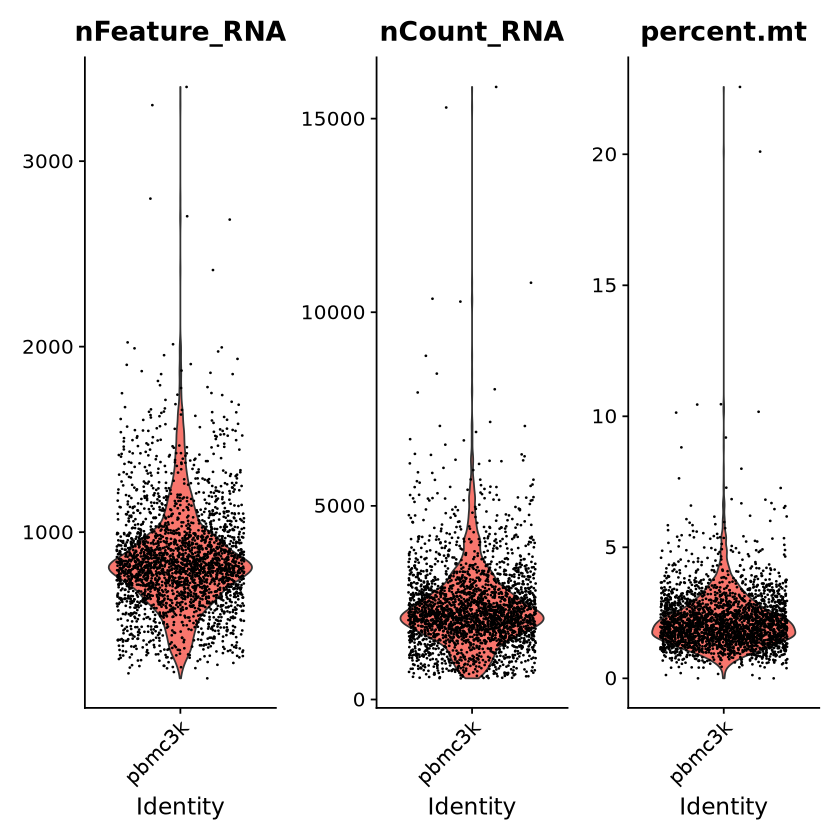

Centering and scaling data matrix

PC_ 1 
Positive:  CST3, TYROBP, LST1, AIF1, FTL, FCN1, S100A9, FTH1, LYZ, TYMP 
	   FCER1G, CFD, LGALS1, S100A8, LGALS2, CTSS, SERPINA1, IFITM3, SPI1, CFP 
	   PSAP, SAT1, IFI30, NPC2, S100A11, COTL1, GRN, LGALS3, CD14, GSTP1 
Negative:  MALAT1, LTB, IL32, IL7R, CD2, B2M, ACAP1, CD27, STK17A, CTSW 
	   GZMM, CD247, CCL5, GIMAP5, AQP3, GZMA, SELL, CST7, MAL, ITM2A 
	   HOPX, GZMK, MYC, TNFAIP8, PNISR, BEX2, LDLRAP1, ETS1, ZAP70, OPTN 
PC_ 2 
Positive:  NKG7, PRF1, CST7, GZMB, GZMA, FGFBP2, CTSW, GNLY, B2M, SPON2 
	   CCL4, GZMH, FCGR3A, CCL5, GZMM, CLIC3, CD247, XCL2, SRGN, AKR1C3 
	   HOPX, TTC38, S100A4, CTSC, IGFBP7, ID2, ANXA1, TPST2, XCL1, ACTB 
Negative:  CD79A, MS4A1, TCL1A, HLA-DQA1, HLA-DQB1, HLA-DRA, LINC00926, CD79B, CD74, HLA-DRB1 
	   HLA-DMA, CD37, HLA-DPB1, HLA-DRB5, LTB, HLA-DPA1, HLA-DMB, FCRLA, HVCN1, BLNK 
	   P2RX5, IGLL5, IRF8, SNHG7, QRSL1, ARHGAP24, SMIM14, PPP1R14A, C16orf74, C6orf48 
PC_ 3 
Positive:  CD79A, CD79B, HLA-DQA1, MS

PC_ 1 
Positive:  CST3, TYROBP, LST1, AIF1, FTL 
Negative:  MALAT1, LTB, IL32, IL7R, CD2 
PC_ 2 
Positive:  NKG7, PRF1, CST7, GZMB, GZMA 
Negative:  CD79A, MS4A1, TCL1A, HLA-DQA1, HLA-DQB1 
PC_ 3 
Positive:  CD79A, CD79B, HLA-DQA1, MS4A1, HLA-DQB1 
Negative:  IL7R, VIM, IL32, TMSB4X, AQP3 
PC_ 4 
Positive:  S100A8, LGALS2, S100A9, MS4A6A, CD14 
Negative:  CDKN1C, LTB, CKB, MS4A7, SIGLEC10 
PC_ 5 
Positive:  VIM, MALAT1, SRSF3, KLF6, LGALS2 
Negative:  PPBP, PF4, MYL9, SDPR, SPARC 


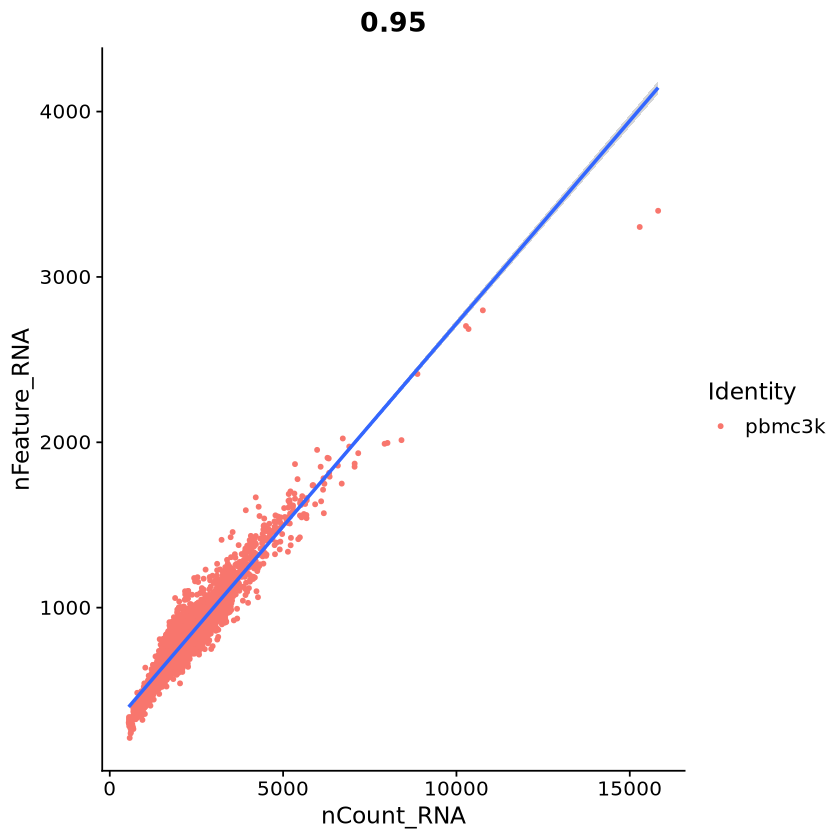

Computing nearest neighbor graph

Computing SNN



Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 2591
Number of edges: 118265

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9629
Number of communities: 4
Elapsed time: 0 seconds
Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 2591
Number of edges: 118265

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9090
Number of communities: 5
Elapsed time: 0 seconds
Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 2591
Number of edges: 118265

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8639
Number of communities: 7
Elapsed time: 0 seconds
Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 2591
Number of edges: 118265

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8311
Number of communities: 7
Elapsed time: 0 seconds
Modularity Optimizer

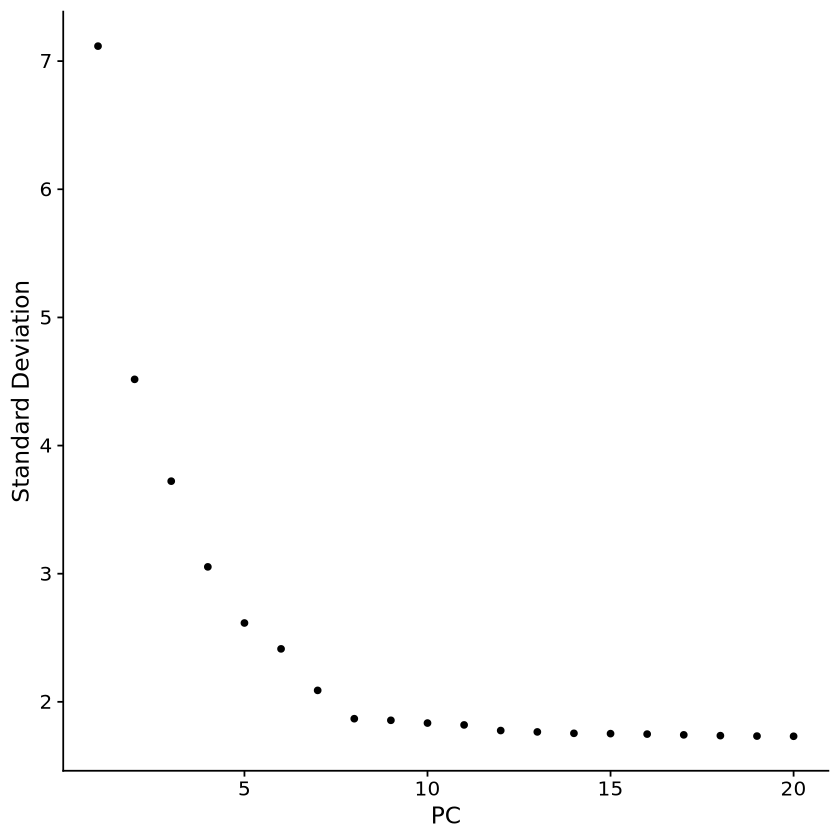

18:18:32 UMAP embedding parameters a = 0.9922 b = 1.112

18:18:32 Read 2591 rows and found 20 numeric columns

18:18:32 Using Annoy for neighbor search, n_neighbors = 30

18:18:32 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
|

18:18:33 Writing NN index file to temp file /tmp/RtmptMDuqH/file15245170dcea

18:18:33 Searching Annoy index using 1 thread, search_k = 3000

18:18:33 Annoy recall = 100%

18:18:34 Commencing smooth kNN distance calibration using 1 thread
 with target n_neighbors = 30

18:18:34 Initializing from normalized Laplacian + noise (using irlba)

18:18:34 Commencing optimization for 500 epochs, with 106972 positive edges

18:18:39 Optimization finished



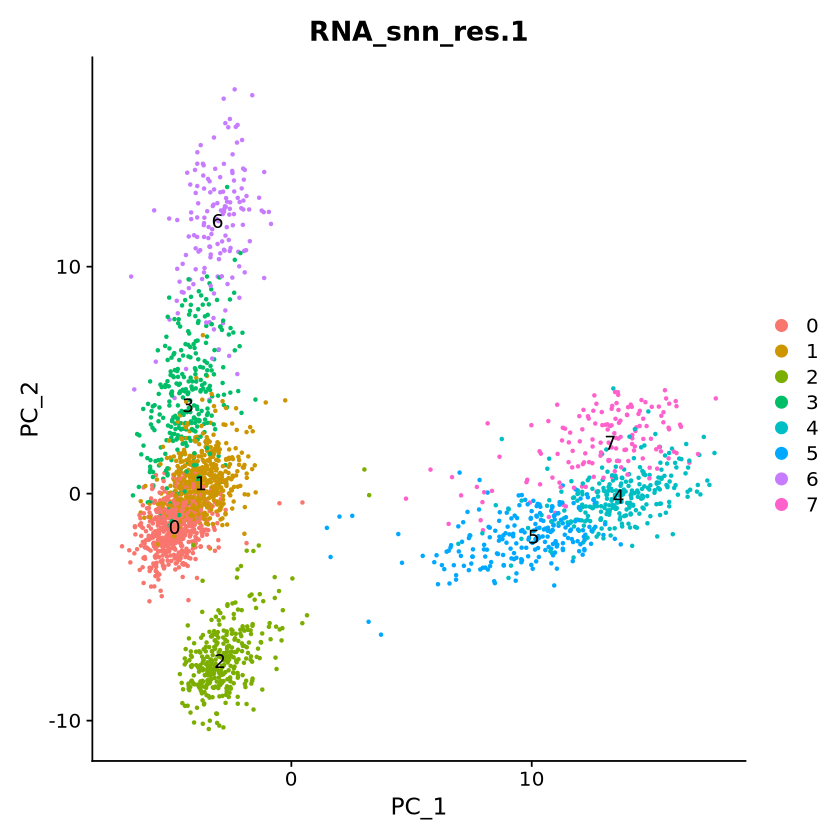

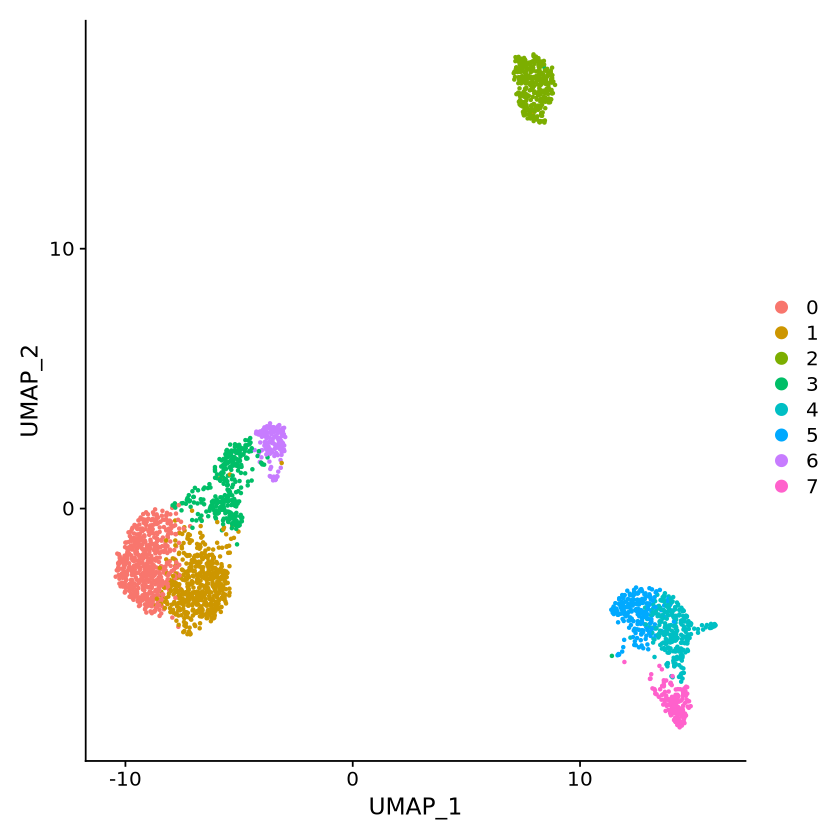

In [4]:
# importing data
path_10x_mtx <- '/home/carlosseiya/bioinfo/data/filtered_gene_bc_matrices/hg19/'
pbmc.data <- Read10X(data.dir = path_10x_mtx)

# preprocessing
pbmc.seurat.obj <- CreateSeuratObject(counts = pbmc.data, project = 'pbmc3k',
                                      min.cells=3,
                                      min.features=200)

# quality control
pbmc.seurat.obj[['percent.mt']] <- PercentageFeatureSet(pbmc.seurat.obj, pattern='^MT-')
# View(pbmc.seurat.obj@meta.data)

# visualizing for filtering
VlnPlot(pbmc.seurat.obj, features=c('nFeature_RNA', 'nCount_RNA', 'percent.mt'), ncol = 3)
FeatureScatter(pbmc.seurat.obj, feature1='nCount_RNA', feature2='nFeature_RNA') +
    geom_smooth(method='lm')

# filtering
# upper.lim <- 1572
upper.lim <- quantile(pbmc.seurat.obj[['nFeature_RNA']]$nFeature_RNA, probs = 0.98)
lower.lim <- quantile(pbmc.seurat.obj[['nFeature_RNA']]$nFeature_RNA, probs=0.02)
# lower.lim <- 361
pbmc.seurat.obj <- subset(pbmc.seurat.obj,
                          subset = nFeature_RNA > lower.lim & nFeature_RNA < upper.lim & percent.mt < 20)

# normalizing
pbmc.seurat.obj <- NormalizeData(pbmc.seurat.obj)

# highly variable genes
pbmc.seurat.obj <- FindVariableFeatures(pbmc.seurat.obj, selection.method='vst', nfeatures=2000) # these are default values
# top10 <- head(VariableFeatures(pbmc.seurat.obj), 10)
# plot1 <- VariableFeaturePlot(pbmc.seurat.obj)
# LabelPoints(plot = plot1, points = top10, repel = TRUE)

# scaling
all.genes <- rownames(pbmc.seurat.obj)
pbmc.seurat.obj <- ScaleData(pbmc.seurat.obj, features = all.genes)

# linear dimensionality reduction (PCA)
pbmc.seurat.obj <- RunPCA(pbmc.seurat.obj, features = VariableFeatures(object = pbmc.seurat.obj))
print(pbmc.seurat.obj[['pca']], dims=1:5, nfeatures=5)
# DimHeatmap(pbmc.seurat.obj, dims=1, cells=500, balanced=TRUE)
ElbowPlot(pbmc.seurat.obj)

# clustering
pbmc.seurat.obj <- FindNeighbors(pbmc.seurat.obj, dims=1:20)
pbmc.seurat.obj <- FindClusters(pbmc.seurat.obj, resolution=c(.1, .3, .5, .7, 1))
# View(pbmc.seurat.obj@meta.data)
DimPlot(pbmc.seurat.obj, group.by = 'RNA_snn_res.1', label=TRUE)
Idents(pbmc.seurat.obj) <- 'RNA_snn_res.1'

# non-linear dimensionality reduction (UMAP)
pbmc.seurat.obj <- RunUMAP(pbmc.seurat.obj, dims=1:20)
DimPlot(pbmc.seurat.obj, reduction='umap')

### Convert Ensembl ID to Gene Symbol
1. biomaRt: https://bioconductor.org/packages/release/bioc/html/biomaRt.html
2. annotables: https://github.com/stephenturner/annotables
3. AnnotationDbi: https://bioconductor.org/packages/release/bioc/html/AnnotationDbi.html
    - org.Hs.eg.db: https://bioconductor.org/packages/release/data/annotation/html/org.Hs.eg.db.html



In [2]:
sigs <- read.delim('~/bioinfo/data/deseq_results.csv', header=TRUE, row.names=1, sep=',')
sigs.df <- as.data.frame(sigs)
head(sigs.df)

,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
ENSG00000069424,231.43808,1.1351282,0.27639622,4.106888,4.010261e-05,1.342057e-03
ENSG00000116254,16.68597,2.7138084,0.65995237,4.112128,3.920295e-05,1.322754e-03
ENSG00000204138,315.73959,-0.5435882,0.13154649,-4.132290,3.591674e-05,1.239615e-03
ENSG00000198830,1111.17922,-1.2078211,0.35207134,-3.430615,6.022151e-04,1.041796e-02
ENSG00000060688,363.79433,-0.6236509,0.09319586,-6.691831,2.203960e-11,1.138621e-08
ENSG00000134690,301.53177,-2.1710176,0.41857731,-5.186658,2.141008e-07,2.226110e-05


In [3]:
# 1. biomaRt
library(biomaRt)

In [13]:
convert_geneid_symbol1 <- function() {
    # listEnsembl()
    # ensembl <- useEnsembl(biomart = 'genes')
    # datasets <- listDatasets(ensembl)
    ensembl.con <- useMart('ensembl', dataset = 'hsapiens_gene_ensembl')
    # attr <- listAttributes(ensembl.con)
    # filters <- listFilters(ensembl.con)
    getBM(attributes = c('ensembl_gene_id', 'external_gene_name'),
          filters = 'ensembl_gene_id',
          values = rownames(sigs.df),
          mart = ensembl.con)
}

mem.obj <- peakRAM(convert_geneid_symbol1)
time_elapsed <- mem.obj$Elapsed_Time_sec
memory_used <- mem.obj$Peak_RAM_Used_MiB
print(time_elapsed)
print(memory_used)

[1] 6.151
[1] 7.5


In [17]:
library(annotables)
library(dplyr)


Attaching package: ‘dplyr’


The following object is masked from ‘package:biomaRt’:

    select


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [22]:
# 2. Annotables
convert_geneid_symbol2 <- function() {
    grch38[, c('ensgene', 'symbol')] %>%
        filter(ensgene %in% rownames(sigs.df))
}

mem.obj <- peakRAM(convert_geneid_symbol2)
time_elapsed <- mem.obj$Elapsed_Time_sec
memory_used <- mem.obj$Peak_RAM_Used_MiB
print(time_elapsed)
print(memory_used)

[1] 0.005
[1] 2.1


In [9]:
library(AnnotationDbi)
library(org.Hs.eg.db)

In [15]:
# 3. AnnotationDbi
convert_geneid_symbol3 <- function() {
    sigs.df$symbol <- mapIds(org.Hs.eg.db,
                             keys=rownames(sigs.df),
                             keytype='ENSEMBL',
                             column='SYMBOL')
    head(sigs.df)
}

mem.obj <- peakRAM(convert_geneid_symbol3)
time_elapsed <- mem.obj$Elapsed_Time_sec
memory_used <- mem.obj$Peak_RAM_Used_MiB
print(time_elapsed)
print(memory_used)

'select()' returned 1:many mapping between keys and columns



[1] 0.004
[1] 0.1


### Legado

In [39]:
smallest.sv <- function(){
  A <- matrix(rnorm(1e6), 1e3);
  mysvd <- svd(A);
  return(tail(mysvd$d, 1));
}

Rprof(tf <- "Rprof.out", memory.profiling=TRUE)

x <- smallest.sv()

Rprof(NULL)
summaryRprof(tf, memory='both')

total_cum_ram_consumed <- max(summaryRprof(tf, memory='both')$by.total$mem.total)
time_elapsed <- summaryRprof(tf, memory='both')$sampling.time

print(total_cum_ram_consumed)
print(time_elapsed)

,self.time,self.pct,total.time,total.pct,mem.total
,<dbl>,<dbl>,<dbl>,<dbl>,"<dbl[,1]>"
"""La.svd""",4.88,97.99,4.88,97.99,17.9
"""rnorm""",0.06,1.20,0.06,1.20,0.0
"""any""",0.02,0.40,0.02,0.40,15.3
"""t.default""",0.02,0.40,0.02,0.40,7.6
,total.time,total.pct,mem.total,self.time,self.pct
,<dbl>,<dbl>,"<dbl[,1]>",<dbl>,<dbl>
"""doTryCatch""",4.98,100.00,40.8,0.00,0.00
"""eval_with_user_handlers""",4.98,100.00,40.8,0.00,0.00
"""eval""",4.98,100.00,40.8,0.00,0.00


[1] 40.8
[1] 4.98


In [ ]:
# rqcCycleQualityBoxCalc(qRes)
# rqcCycleBaseCallsLinePlot(qRes)
# rqcReadFrequencyPlot(qRes)

# openFileInOS(rqc_report)